In [1]:
import os
import shutil
from itertools import combinations

import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D

from utils.skeleton_keypoints import *

In [2]:
def remove_outliers_iqr(data, factor=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data >= (Q1 - factor * IQR)) & (data <= (Q3 + factor * IQR))]

In [3]:
data_num = 1

true_path = f"transformed_keypoints/hirasaki_{data_num}_true.csv"
df_true = pd.read_csv(true_path, index_col=0)

pred_path = f"transformed_keypoints/hirasaki_{data_num}_123_transformed.csv"
df_pred = pd.read_csv(pred_path, index_col=0)

In [4]:
x_values = pd.concat([df_true.filter(like="_x"), df_pred.filter(like="_x")]).stack()
y_values = pd.concat([df_true.filter(like="_y"), df_pred.filter(like="_y")]).stack()
z_values = pd.concat([df_true.filter(like="_z"), df_pred.filter(like="_z")]).stack()

max_x = remove_outliers_iqr(x_values).max()
min_x = remove_outliers_iqr(x_values).min()
max_y = remove_outliers_iqr(y_values).max() + 500
min_y = remove_outliers_iqr(y_values).min() - 500
max_z = remove_outliers_iqr(z_values).max()
min_z = remove_outliers_iqr(z_values).min()

In [5]:
idx = 100

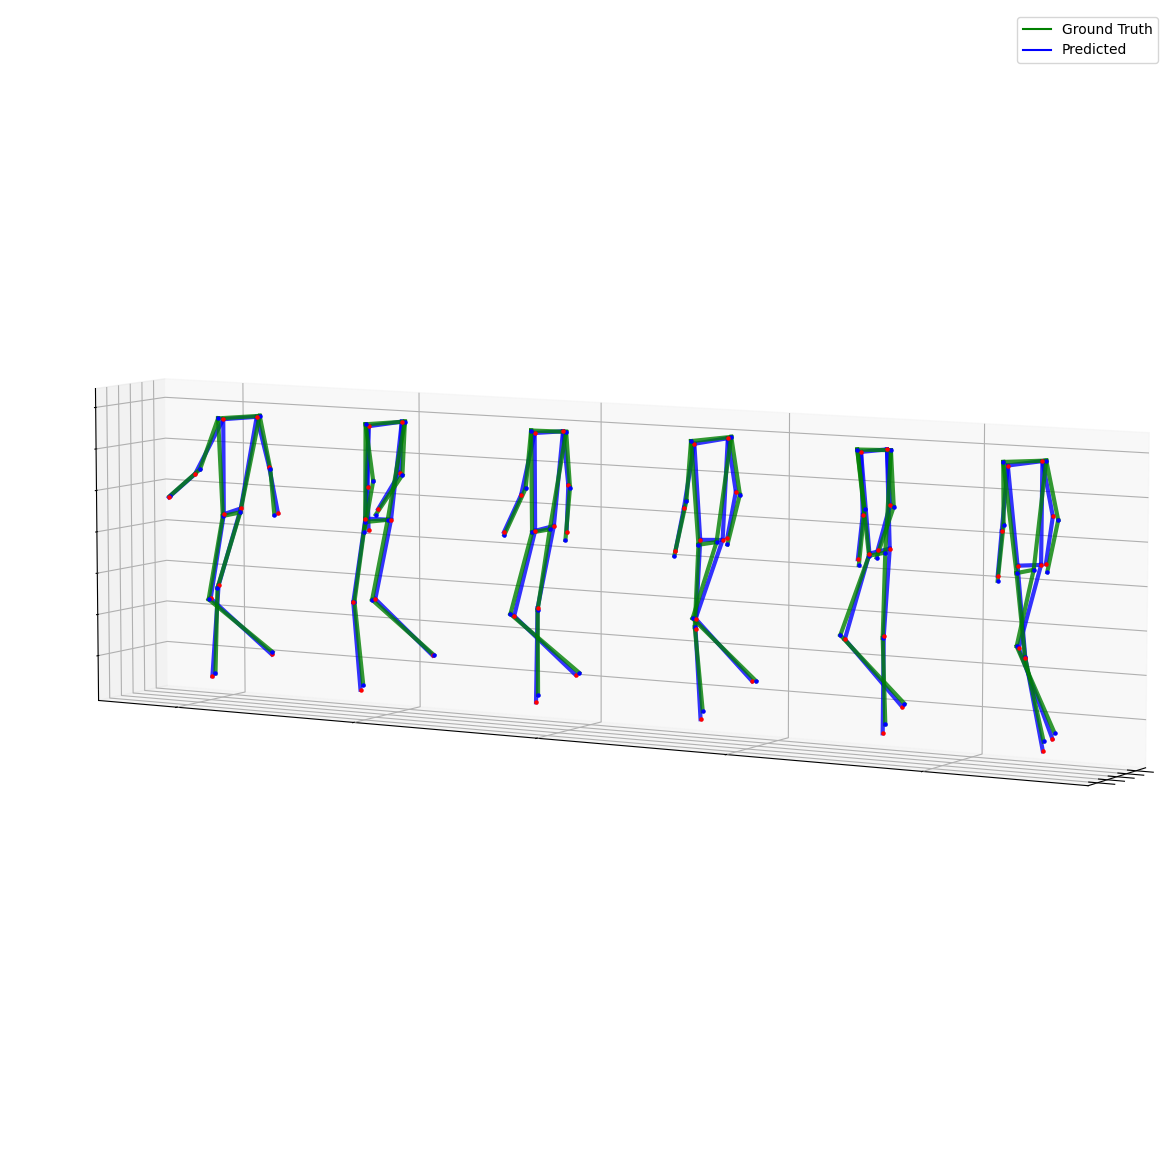

In [6]:
fig = plt.figure(figsize=(100, 15))
ax = fig.add_subplot(111, projection='3d')
# ax.set_xlim3d(min_x, max_x)
# ax.set_ylim3d(min_y, max_y)
# ax.set_zlim3d(min_z, max_z)

ax.view_init(elev=7, azim=30)

for i, idx in enumerate([50, 90, 120, 150, 180, 210]):
    pose_result1 = df_true.loc[idx].values.reshape(-1, 3)
    pose_result2 = df_pred.loc[idx].values.reshape(-1, 3)
    
    # iごとにyを100ずつずらす
    pose_result1[:, 1] -= i * 200
    pose_result2[:, 1] -= i * 200
    
    for key, value in compare_keypoints_connections.items():
        start_idx = value[0]
        end_idx = value[1]
        ax.plot([pose_result1[start_idx][0], pose_result1[end_idx][0]],
                [pose_result1[start_idx][1], pose_result1[end_idx][1]],
                [pose_result1[start_idx][2], pose_result1[end_idx][2]], linewidth=3, color='b', alpha=0.8)

    for i in range(len(pose_result1)):
        ax.scatter(pose_result1[i][0], pose_result1[i][1], pose_result1[i][2], color='r', s=5)

    for key, value in compare_keypoints_connections.items():
        start_idx = value[0]
        end_idx = value[1]
        ax.plot([pose_result2[start_idx][0], pose_result2[end_idx][0]],
                [pose_result2[start_idx][1], pose_result2[end_idx][1]],
                [pose_result2[start_idx][2], pose_result2[end_idx][2]], linewidth=3, color='g', alpha=0.8)

    for i in range(len(pose_result2)):
        ax.scatter(pose_result2[i][0], pose_result2[i][1], pose_result2[i][2], color='b', s=5)

ax.plot([], [], color='g', label='Ground Truth')
ax.plot([], [], color='b', label='Predicted')
# ax.set_xlabel('X [mm]', labelpad=6)
# ax.set_ylabel('Y [mm]', labelpad=6)
# ax.set_zlabel('Z [mm]', labelpad=6)

# ax.xaxis.set_major_locator(MaxNLocator(nbins=2))
# ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
# ax.zaxis.set_major_locator(MaxNLocator(nbins=5))

# 目盛りの数値だけ消す
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_aspect('equal')
ax.legend(loc='upper right', fontsize=10)
plt.show()

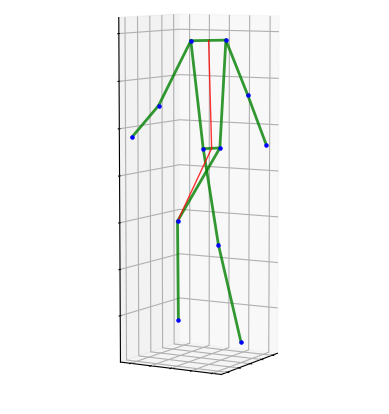

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=7, azim=30)

for i, idx in enumerate([130]):
    pose_result1 = df_true.loc[idx].values.reshape(-1, 3)

    for key, value in compare_keypoints_connections.items():
        start_idx = value[0]
        end_idx = value[1]
        ax.plot([pose_result1[start_idx][0], pose_result1[end_idx][0]],
                [pose_result1[start_idx][1], pose_result1[end_idx][1]],
                [pose_result1[start_idx][2], pose_result1[end_idx][2]], linewidth=2, color='g', alpha=0.8)

    for i in range(len(pose_result1)):
        ax.scatter(pose_result1[i][0], pose_result1[i][1], pose_result1[i][2], color='b', s=5)
    
    # 0, 1の中点を求める
    center_shoulder = (pose_result1[0] + pose_result1[1]) / 2
    # 6, 7の中点を求める
    center_hip = (pose_result1[6] + pose_result1[7]) / 2
    # 9
    center_knee = pose_result1[9]
    
    # 0, 1の中点と6, 7の中点を結ぶ
    ax.plot([center_shoulder[0], center_hip[0]],
            [center_shoulder[1], center_hip[1]],
            [center_shoulder[2], center_hip[2]], linewidth=1, color='r', alpha=0.8)
    # 6, 7の中点と9を結ぶ
    ax.plot([center_hip[0], center_knee[0]],
            [center_hip[1], center_knee[1]],
            [center_hip[2], center_knee[2]], linewidth=1, color='r', alpha=0.8)    

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_aspect('equal')
plt.show()